# Portfolio Optimization

Download the JSE Top 40 Closing Prices excel file from RUconnected and paste in the same directory as this notebook.  Import that excel file and store it as a DataFrame called `df`.

Using the list below, select the stocks that have been chosen for you and store it as a DataFrame called `prices`:

- 18S0848:[JSE:SLM,JSE:INL,JSE:MTN,JSE:NPH,JSE:GRT,JSE:SAP,JSE:RES,JSE:REM,JSE:IMP,JSE:AMS]
- 18K5600:[JSE:TCP,JSE:MRP,JSE:SBK,JSE:EXX,JSE:CLS,JSE:GRT,JSE:AMS,JSE:TBS,JSE:MTN,JSE:DSY]
- 19M8491:[JSE:GFI,JSE:APN,JSE:GRT,JSE:CPI,JSE:BVT,JSE:WHL,JSE:RES,JSE:TCP,JSE:NED,JSE:DSY]
- 23M8732:[JSE:FSR,JSE:REM,JSE:APN,JSE:NED,JSE:TCP,JSE:GRT,JSE:GFI,JSE:SHP,JSE:MTN,JSE:DSY]
- 23M4785:[JSE:GFI,JSE:TRU,JSE:CLS,JSE:MRP,JSE:TCP,JSE:MTN,JSE:BTI,JSE:SOL,JSE:NPN,JSE:DSY]
- 17B5426:[JSE:ANG,JSE:AMS,JSE:SBK,JSE:SHP,JSE:INL,JSE:KIO,JSE:BTI,JSE:RDF,JSE:RES,JSE:EXX]
- 23R7256:[JSE:IMP,JSE:LHC,JSE:SHP,JSE:BVT,JSE:GLN,JSE:BTI,JSE:EXX,JSE:NPN,JSE:CLS,JSE:AMS]

Ensure that the `prices` DataFrame only contains records from 2022.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.optimize as sco


In [3]:
df = pd.read_excel("JSE Top 40 Closing Prices (1-1-2017 to 30-12-2022).xlsx")
df

,Date,JSE:ABG,JSE:AMS,JSE:ANG,JSE:APN,JSE:BTI,JSE:BVT,JSE:CLS,JSE:CPI,JSE:DCP,...,JSE:RES,JSE:SAP,JSE:SBK,JSE:SHP,JSE:SLM,JSE:SOL,JSE:TBS,JSE:TCP,JSE:TRU,JSE:WHL
0,03/01/2017,17000,27672,15093,28208,77975.0,17997,11746.0,69300,2235,...,11272,8900,15260,17295,6383,40657,39434,1375,8026,7184
1,04/01/2017,17170,28202,15339,28278,77050.0,17792,11450.0,68850,2212,...,11543,8842,15155,16901,6496,40440,39069,1376,8000,7090
2,05/01/2017,16680,29250,15900,27500,76825.0,17300,11249.0,69000,2209,...,11417,8800,14901,16840,6373,39950,39255,1421,7745,6909
3,06/01/2017,16950,28961,16030,27533,77096.0,17230,11344.0,68964,2175,...,11460,8845,15038,16733,6451,40360,39737,1391,7683,6977
4,09/01/2017,16967,28170,15614,27500,77466.0,17352,11423.0,68791,2201,...,11600,8800,15158,16850,6466,40102,39761,1389,7663,6894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,22/12/2022,19532,145055,33190,13733,68813.0,22011,28357.0,188516,2920,...,5314,4920,17295,23495,4835,27066,21500,3300,5649,6736
1496,23/12/2022,19700,145176,33936,14008,68670.0,22175,28044.0,189921,2910,...,5418,4940,17365,23531,4930,27400,21500,3327,5657,6767
1497,28/12/2022,19600,149617,33657,13597,69225.0,21885,28194.0,189257,2913,...,5417,5000,17115,23167,4846,27447,21279,3305,5681,6732
1498,29/12/2022,19420,145498,33728,13634,67748.0,21507,27930.0,186967,2878,...,5356,4950,16900,22834,4873,26974,20956,3290,5627,6691


In [4]:
price = df.loc[1250:, ['JSE:GFI','JSE:APN','JSE:GRT','JSE:CPI','JSE:BVT','JSE:WHL','JSE:RES','JSE:TCP','JSE:NED','JSE:DSY']]
price

,JSE:GFI,JSE:APN,JSE:GRT,JSE:CPI,JSE:BVT,JSE:WHL,JSE:RES,JSE:TCP,JSE:NED,JSE:DSY
1250,17120,21982,1549,203508,19076,5206,6000,4655,17843,14459
1251,17111,23349,1551,206000,19000,5239,6001,4750,18033,14669
1252,17068,23303,1550,208858,18990,5239,6136,4770,18595,14924
1253,15816,22680,1539,212826,18912,5217,6208,4852,18469,14737
1254,15753,22360,1513,213082,18960,5230,6089,4908,18500,14797
...,...,...,...,...,...,...,...,...,...,...
1495,18150,13733,1438,188516,22011,6736,5314,3300,21221,12393
1496,18525,14008,1477,189921,22175,6767,5418,3327,21482,12415
1497,18328,13597,1473,189257,21885,6732,5417,3305,21315,12397
1498,18443,13634,1459,186967,21507,6691,5356,3290,21277,12293


Calculate the variance covariance matrix and call it `vcm`.  Plot `vcm` as a `heatmap` using the `Seaborn` library.  Use as many cells as needed.

In [5]:
returns = price/price.shift(1) - 1 #calclulating the returns of the stocks
returns = returns.dropna() #drop invalid data
vcm = returns.cov() #covariance matrics for the returns
vcm


,JSE:GFI,JSE:APN,JSE:GRT,JSE:CPI,JSE:BVT,JSE:WHL,JSE:RES,JSE:TCP,JSE:NED,JSE:DSY
JSE:GFI,0.001270,0.000036,-0.000033,-0.000010,-0.000009,-0.000045,-0.000002,-0.000011,-0.000013,0.000033
JSE:APN,0.000036,0.000555,0.000149,0.000160,0.000110,0.000139,0.000072,0.000122,0.000147,0.000168
JSE:GRT,-0.000033,0.000149,0.000237,0.000101,0.000116,0.000119,0.000118,0.000092,0.000132,0.000127
JSE:CPI,-0.000010,0.000160,0.000101,0.000400,0.000141,0.000111,0.000067,0.000122,0.000185,0.000194
JSE:BVT,-0.000009,0.000110,0.000116,0.000141,0.000267,0.000141,0.000074,0.000132,0.000161,0.000156
JSE:WHL,-0.000045,0.000139,0.000119,0.000111,0.000141,0.000360,0.000066,0.000107,0.000128,0.000112
JSE:RES,-0.000002,0.000072,0.000118,0.000067,0.000074,0.000066,0.000153,0.000075,0.000085,0.000107
JSE:TCP,-0.000011,0.000122,0.000092,0.000122,0.000132,0.000107,0.000075,0.000430,0.000170,0.000171
JSE:NED,-0.000013,0.000147,0.000132,0.000185,0.000161,0.000128,0.000085,0.000170,0.000321,0.000210
JSE:DSY,0.000033,0.000168,0.000127,0.000194,0.000156,0.000112,0.000107,0.000171,0.000210,0.000346


<Axes: >

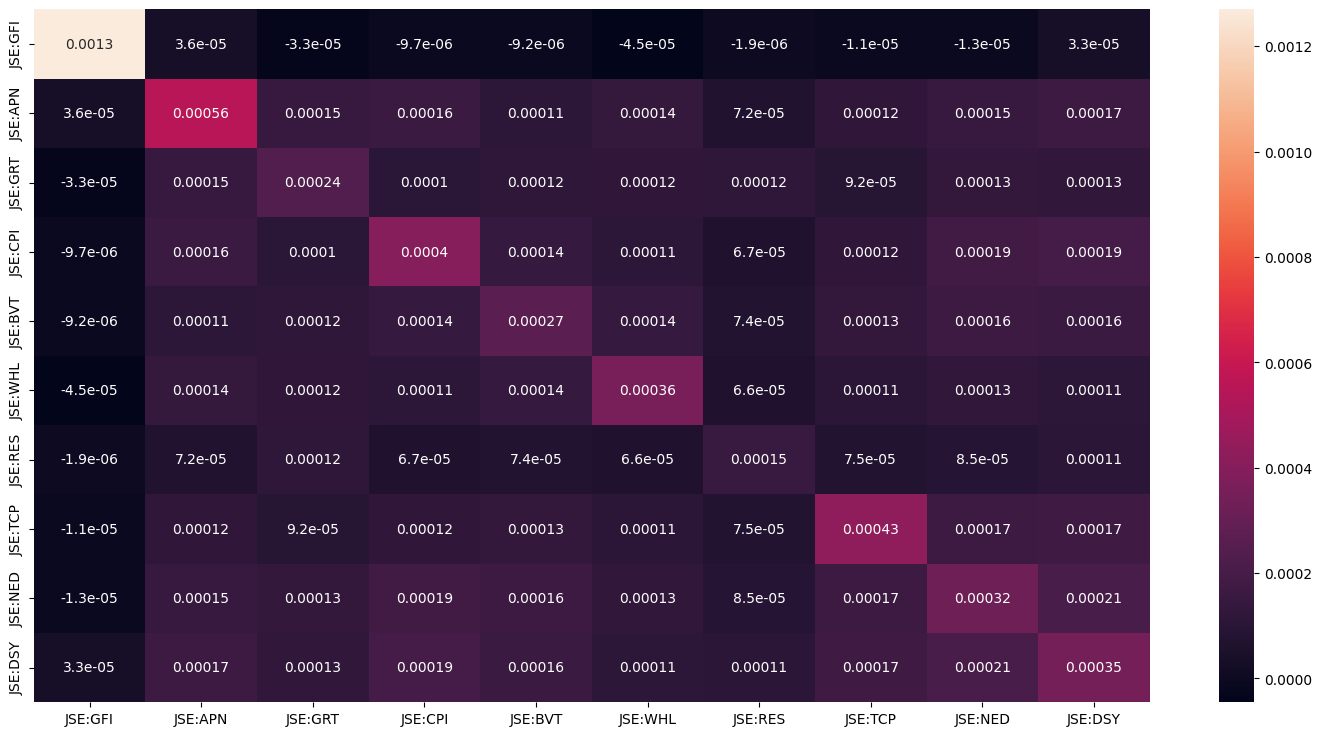

In [6]:
plt.figure(figsize=(18,9)) #adjusting the size of the heatmeap
sns.heatmap(vcm,annot=True) #drawing the heatmap with vaules

In [7]:
mean_returns = returns.mean() # average returns of each stock for the time frame
mean_returns

JSE:GFI    0.000744
JSE:APN   -0.001641
JSE:GRT   -0.000136
JSE:CPI   -0.000162
JSE:BVT    0.000601
JSE:WHL    0.001157
JSE:RES   -0.000365
JSE:TCP   -0.001154
JSE:NED    0.000864
JSE:DSY   -0.000464
dtype: float64

In [8]:
st_dev = returns.std() # standard dev fo the returns
st_dev


JSE:GFI    0.035636
JSE:APN    0.023566
JSE:GRT    0.015386
JSE:CPI    0.020011
JSE:BVT    0.016342
JSE:WHL    0.018976
JSE:RES    0.012369
JSE:TCP    0.020742
JSE:NED    0.017920
JSE:DSY    0.018596
dtype: float64

In [9]:
sharpe_ratio = mean_returns/st_dev #sharpe ratios for each stock in the portfolio

sharpe_ratio


JSE:GFI    0.020870
JSE:APN   -0.069646
JSE:GRT   -0.008866
JSE:CPI   -0.008073
JSE:BVT    0.036782
JSE:WHL    0.060980
JSE:RES   -0.029499
JSE:TCP   -0.055631
JSE:NED    0.048234
JSE:DSY   -0.024952
dtype: float64

Calculate the optimal weights, portfolio return, portfolio standard deviation and portfolio Sharpe ratio of the Maximum Sharpe Ratio portfolio.  Store the variables as `msr_weights`, `msr_return`, `msr_std` and `msr_sr` respectively. Use as many cells as needed.

In [10]:
def neg_sharpe_ratio(weights, mean_returns, vcm):
    portfolio_return = np.sum(mean_returns*weights)
    portfolio_var = np.dot(weights.T, np.dot(vcm,weights))
    portfolio_std_dev = np.sqrt(portfolio_var)
    sharpe_ratio = portfolio_return/portfolio_std_dev
    return -sharpe_ratio 

In [11]:
#constraints
def weight_constraint(weights): #weight is mean
    return np.sum(weights) - 1
def individual_weight_constraint(weights):
    return weights


In [12]:
constraints = ({'type': 'eq', 'fun': weight_constraint},
               {'type': 'ineq', 'fun': individual_weight_constraint})
initial_weights = np.array([1/len(price.columns) for i in range(len(price.columns))])
bounds = tuple((0,1) for i in range(len(price.columns)))

results = sco.minimize(neg_sharpe_ratio, initial_weights, 
                       args=(mean_returns,vcm), 
                       method="SLSQP", 
                       bounds=bounds, 
                       constraints=constraints)
results



 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.07125898623319174
       x: [ 1.387e-01  9.498e-17  4.472e-17  2.557e-17  7.850e-17
            5.376e-01  0.000e+00  3.123e-17  3.236e-01  0.000e+00]
     nit: 14
     jac: [ 8.511e-04  1.620e-01  4.625e-02  5.369e-02  2.748e-03
           -1.492e-04  4.836e-02  1.215e-01 -1.217e-04  8.039e-02]
    nfev: 155
    njev: 14

In [13]:
msr_weights = results.x
msr_weights


array([1.38748634e-01, 9.49761103e-17, 4.47233396e-17, 2.55736187e-17,
       7.84962373e-17, 5.37606083e-01, 0.00000000e+00, 3.12250226e-17,
       3.23645283e-01, 0.00000000e+00])

In [14]:
msr_return = np.dot(msr_weights, mean_returns)
msr_return

0.0010050388759499894

In [15]:
msr_std = np.sqrt(np.dot(msr_weights.T, np.dot(vcm,msr_weights)))
msr_std


0.014104029948742831

In [16]:
msr_sr = msr_return/msr_std
msr_sr

0.07125898623319174

Calculate the optimal weights, portfolio return, portfolio standard deviation and portfolio Sharpe ratio of the Minimum Variance portfolio.  Store the variables as `mv_weights`, `mv_return`, `mv_std` and `mv_sr` respectively. Use as many cells as needed.

In [17]:
def portfolio_var(weights, vcm):
    portfolio_var = np.dot(weights.T, np.dot(vcm,weights))
    return portfolio_var

In [18]:
def weight_constraint(weights): 
    return np.sum(weights) - 1
def individual_weight_constraint(weights):
    return weights

In [19]:
constraints = ({'type': 'eq', 'fun': weight_constraint},
               {'type': 'ineq', 'fun': individual_weight_constraint})
initial_weights = np.array([1/len(price.columns) for i in range(len(price.columns))])
bounds = tuple((0,1) for i in range(len(price.columns)))

results = sco.minimize(portfolio_var, initial_weights, 
                       args=(vcm), 
                       method="SLSQP", 
                       bounds=bounds, 
                       constraints=constraints)
results


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.0001340552657874429
       x: [ 1.000e-01  1.000e-01  1.000e-01  1.000e-01  1.000e-01
            1.000e-01  1.000e-01  1.000e-01  1.000e-01  1.000e-01]
     nit: 1
     jac: [ 2.433e-04  3.320e-04  2.316e-04  2.941e-04  2.577e-04
            2.475e-04  1.629e-04  2.819e-04  3.056e-04  3.245e-04]
    nfev: 11
    njev: 1

In [20]:
mv_weights = results.x
mv_weights


array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [21]:
mv_return = np.dot(mv_weights, mean_returns)
mv_return

-5.5566796130784815e-05

In [22]:
mv_std = np.sqrt(np.dot(mv_weights.T, np.dot(vcm,mv_weights)))
mv_std

0.011578223775149749

In [23]:
mv_sr = mv_return/mv_std
mv_sr

-0.004799250490394511

Calculate the optimal weights, portfolio return, portfolio standard deviation and portfolio Sharpe ratio of the Risk portfolio.  Store the variables as `rp_weights`, `rp_return`, `rp_std` and `rp_sr` respectively. Use as many cells as needed.

In [24]:
def neg_portfolio_return(weights, mean_returns):
    portfolio_return = np.sum(mean_returns*weights)
    return - portfolio_return


In [25]:
#defining weight constrains

def weight_constraint(weights):
    return np.sum(weights)-1
def individual_weight_constraint(weights):
    return weights


In [26]:
# constraints for the stocks, I named each stock A to J repectively.
# is there an seasier way to loop through all the values
def MCA_MCB(weights):
    portfolio_var = np.dot(weights.T, np.dot(vcm,weights.T))
    MCA = (weights[0]/portfolio_var)*(weights@vcm.iloc[0])
    MCB = (weights[1]/portfolio_var)*(weights@vcm.iloc[1])
    return MCA - MCB
def MCB_MDC(weights):
    portfolio_var = np.dot(weights.T, np.dot(vcm,weights.T))
    MCB = (weights[1]/portfolio_var)*(weights@vcm.iloc[1])
    MDC = (weights[2]/portfolio_var)*(weights@vcm.iloc[2])
    return MCB - MDC
def MDC_MED(weights):
    portfolio_var = np.dot(weights.T, np.dot(vcm,weights.T))
    MDC = (weights[2]/portfolio_var)*(weights@vcm.iloc[2])
    MED = (weights[3]/portfolio_var)*(weights@vcm.iloc[3])
    return  MDC - MED
def MED_MFE(weights):
    portfolio_var = np.dot(weights.T, np.dot(vcm,weights.T))
    MED = (weights[3]/portfolio_var)*(weights@vcm.iloc[3])
    MFE = (weights[4]/portfolio_var)*(weights@vcm.iloc[4])
    return MED - MFE
def MFE_MGF(weights):
    portfolio_var = np.dot(weights.T, np.dot(vcm,weights.T))
    MFE = (weights[4]/portfolio_var)*(weights@vcm.iloc[4])
    MGF = (weights[5]/portfolio_var)*(weights@vcm.iloc[5])
    return MFE - MGF
def MGF_MHG(weights):
    portfolio_var = np.dot(weights.T, np.dot(vcm,weights.T))
    MGF = (weights[5]/portfolio_var)*(weights@vcm.iloc[5])
    MHG = (weights[6]/portfolio_var)*(weights@vcm.iloc[6])
    return MGF - MHG
def MHG_MIH(weights):
    portfolio_var = np.dot(weights.T, np.dot(vcm,weights.T))
    MHG = (weights[6]/portfolio_var)*(weights@vcm.iloc[6])
    MIH = (weights[7]/portfolio_var)*(weights@vcm.iloc[7])
    return MHG - MIH
def MIH_MJI(weights):
    portfolio_var = np.dot(weights.T, np.dot(vcm,weights.T))
    MIH = (weights[7]/portfolio_var)*(weights@vcm.iloc[7])
    MJI = (weights[8]/portfolio_var)*(weights@vcm.iloc[8])
    return MIH - MJI
def MJI_MJJ(weights):
    portfolio_var = np.dot(weights.T, np.dot(vcm,weights.T))
    MJI = (weights[8]/portfolio_var)*(weights@vcm.iloc[8])
    MJJ = (weights[9]/portfolio_var)*(weights@vcm.iloc[9])
    return MJI - MJJ




    


In [27]:
constraints = ({'type': 'eq', 'fun': weight_constraint},
               {'type': 'eq', 'fun': MCA_MCB},
               {'type': 'eq', 'fun': MCB_MDC},
               {'type': 'eq', 'fun': MDC_MED},
               {'type': 'eq', 'fun': MED_MFE},
               {'type': 'eq', 'fun': MFE_MGF},
               {'type': 'eq', 'fun': MGF_MHG},
               {'type': 'eq', 'fun': MHG_MIH},
               {'type': 'eq', 'fun': MIH_MJI},
               {'type': 'eq', 'fun': MJI_MJJ},
               {'type': 'ineq', 'fun': individual_weight_constraint})
initial_weights = np.array([1/len(price.columns) for i in range(len(price.columns))])
bounds = tuple((0, 1) for i in range(len(price.columns)))

result = sco.minimize(neg_portfolio_return, initial_weights, args=(mean_returns), method='SLSQP', bounds=bounds, constraints=constraints)
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 3.223193852108653e-05
       x: [ 1.024e-01  8.180e-02  1.089e-01  9.110e-02  1.008e-01
            1.038e-01  1.487e-01  9.377e-02  8.688e-02  8.178e-02]
     nit: 3
     jac: [-7.437e-04  1.641e-03  1.364e-04  1.616e-04 -6.011e-04
           -1.157e-03  3.649e-04  1.154e-03 -8.644e-04  4.640e-04]
    nfev: 34
    njev: 3

In [28]:
rp_weights = result.x
rp_weights

array([0.10241036, 0.0818011 , 0.10887863, 0.09110339, 0.10082134,
       0.10382804, 0.148726  , 0.09376825, 0.08687964, 0.08178326])

In [29]:
rp_return = -result.fun
rp_return

-3.223193852108653e-05

In [30]:
rp_std = np.sqrt(np.dot(rp_weights.T, np.dot(vcm,rp_weights)))
rp_std

0.01123349762551781

In [31]:
rp_sr = rp_return/rp_std
rp_sr

-0.0028692700702467803

Determine if the Risk Parity portfolio is infact optimized by estimating the Mean Variance Optimisation portfolio where the portfolio variance needs to equal that of the Risk Parity portfolio.  

In [32]:
def portfolio_var(weights, vcm):
    portfolio_var = np.dot(weights.T, np.dot(vcm,weights))
    return portfolio_var

In [33]:
def weight_constraint(weights): 
    return np.sum(weights) - 1
def individual_weight_constraint(weights):
    return weights
def return_constraints(weights):
    return np.dot(weights,mean_returns)


In [34]:
constraints = ({'type': 'eq', 'fun': weight_constraint},
               {'type': 'eq', 'fun': return_constraints},
               {'type': 'ineq', 'fun': individual_weight_constraint})
initial_weights = np.array([1/len(price.columns) for i in range(len(price.columns))])
bounds = tuple((0,1) for i in range(len(price.columns)))

results = sco.minimize(portfolio_var, initial_weights, 
                       args=(vcm), 
                       method="SLSQP", 
                       bounds=bounds, 
                       constraints=constraints)
results


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.00013325603269690597
       x: [ 1.060e-01  8.804e-02  9.943e-02  9.918e-02  1.049e-01
            1.091e-01  9.778e-02  9.174e-02  1.069e-01  9.688e-02]
     nit: 1
     jac: [ 2.433e-04  3.320e-04  2.316e-04  2.941e-04  2.577e-04
            2.475e-04  1.629e-04  2.819e-04  3.056e-04  3.245e-04]
    nfev: 12
    njev: 1

In [35]:
variance_rp = np.dot(rp_weights.T, np.dot(vcm,rp_weights))
Variance_mean_variance = results.fun
print("The variance of the risk parity Portfolio is", variance_rp, "and the variance for the mean variance portfolio is ",Variance_mean_variance)
print("The Risk Parity portfolio is not optimised")

The variance of the risk parity Portfolio is 0.00012619146890251425 and the variance for the mean variance portfolio is  0.00013325603269690597
The Risk Parity portfolio is not optimised
